# Aula 03 - Arvores de decisão e Randon Forest

## Objetivos Aula de hoje

* Arvore de decisão

* Entropia

* Visualização dos dados

* IRIS

* Train test split

* Randon Forest

* Atividade 1

In [57]:
import os, sys
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

## Árvores de decisão


https://pt.akinator.com/

In [31]:
# Referência: https://www.researchgate.net/publication/348456545_Drivers_of_economic_and_financial_integration_A_machine_learning_approach

display(Image(url='https://www.researchgate.net/publication/348456545/figure/fig1/AS:981743439994883@1611077284634/Schematic-of-a-Decision-Tree-The-figure-shows-an-example-of-a-decision-tree-with-3.png'))

In [33]:
display(Image(url='https://storage.googleapis.com/profit-prod/wp-content/uploads/2025/03/2760d826-decision-tree.png'))

### Entropia a Incerteza na separação de classes

* Entropia (Em Aprendizado de Máquina): Medida da Separação de classes / incerteza ao identificar um objeto de uma classe
* Entropia (Física): Medida da *desordem* - Número de possíveis microestados que correspondem a um sistema macroscópico.


$$
\Large H(X) = - \sum_{i=1}^{n} p_i \log_2 p_i
$$

Onde: 
* H(X) -> Medida da entropia do sistema em função de uma variável X
* $ p_i $ -> Probabilidade da i-ésima classe


$$ \Large IG = E(parent) - \sum{w_i \cdot E(node)}  $$

Na Física
$$ \Large S = K_b \log(\omega) $$

* S -> Entropia
* $ \omega $ -> Número de micro-estados (Distintas configurações microscópicas consistentes com o estado macroscópico observado)
* $ K_b $ -> Constante de Boltzmann, $ K_b \approx  1.380649 \cdot 10^{23} \frac{J}{K} $



![Boltzman](https://www.researchgate.net/profile/Bahman-Zohuri/publication/327234817/figure/fig8/AS:726270384025602@1550167761738/Ludwig-Boltzmanns-grave-in-the-Zentralfriedhof-Vienna-Austria-bearing-the-entropy_Q640.jpg)

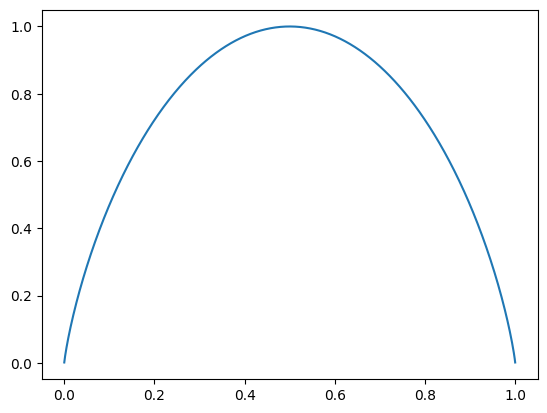

In [25]:
x1 = np.linspace(0.0001, 0.9999, 1000)
x2 = 1 - x1
y = - x1*np.log2(x1) - (x2)*np.log2(x2)
plt.plot(x1, y)

In [11]:
n = 40
x = 2*np.random.rand(n) - 1
y = 2*np.random.rand(n) - 1
z = np.zeros([n])

for i in range(n):
    if x[i] > -0.5 and x[i] < 0.5 and y[i] > -0.5 and y[i] < 0.5:
        z[i] = 1    
        
px.scatter(x=x, y=y, color=z, height=800, width=800, size=y+4).update_coloraxes(showscale=False)

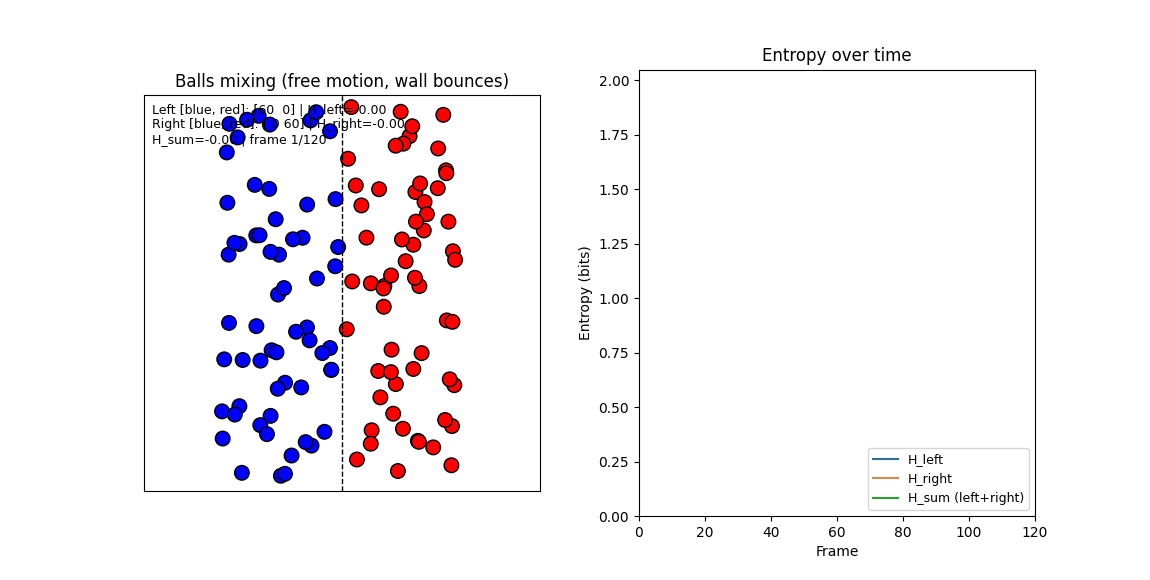

In [28]:
display(Image(filename='entropia.gif'))

In [24]:
-(7/27)*np.log2(7/27) - (20/27)*np.log2(20/27)

np.float64(0.8256265261578954)

## Exemplo com Dataset do Pinguim

In [36]:
df = pd.read_csv('../Aula_02/penguins_lter.csv')
df.drop(columns=['studyName',
                 'Comments'], inplace=True)
df.dropna(inplace=True)
df = df[df['Sex'] != '.']

In [51]:
y = df['Sex']
X = df.drop(columns=['Sex'])
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

In [50]:
categorical_cols = ["Species", "Region", "Island", "Stage",
                    "Individual ID", "Clutch Completion", "Date Egg"]
numeric_cols = ["Sample Number", "Culmen Length (mm)", "Culmen Depth (mm)",
                "Flipper Length (mm)", "Body Mass (g)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

In [67]:
classificador = DecisionTreeClassifier(random_state=42)
clf = Pipeline(steps=[("preprocessor", preprocessor), ("model", classificador)])
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Species', 'Region',
                                                   'Island', 'Stage',
                                                   'Individual ID',
                                                   'Clutch Completion',
                                                   'Date Egg']),
                                                 ('num', 'passthrough',
                                                  ['Sample Number',
                                                   'Culmen Length (mm)',
                                                   'Culmen Depth (mm)',
                                                   'Flipper Length (mm)',
                                                   'Body Mass (g)',
                                                   'Delta 15 N (o/oo)',
                                                   'Delta 13 C (o/oo)'])])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [62]:
y_pred = clf.predict(X_test)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      FEMALE       0.93      0.76      0.83        33
        MALE       0.79      0.94      0.86        32

    accuracy                           0.85        65
   macro avg       0.86      0.85      0.85        65
weighted avg       0.86      0.85      0.85        65



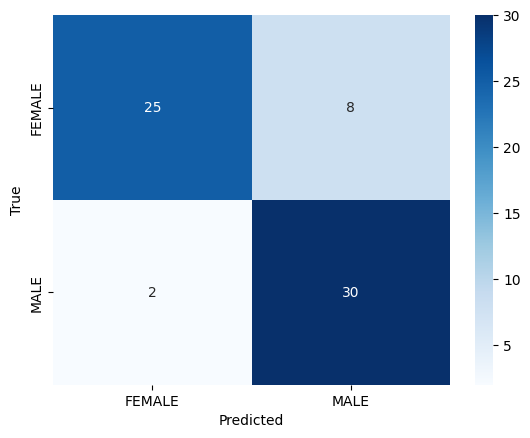

In [64]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

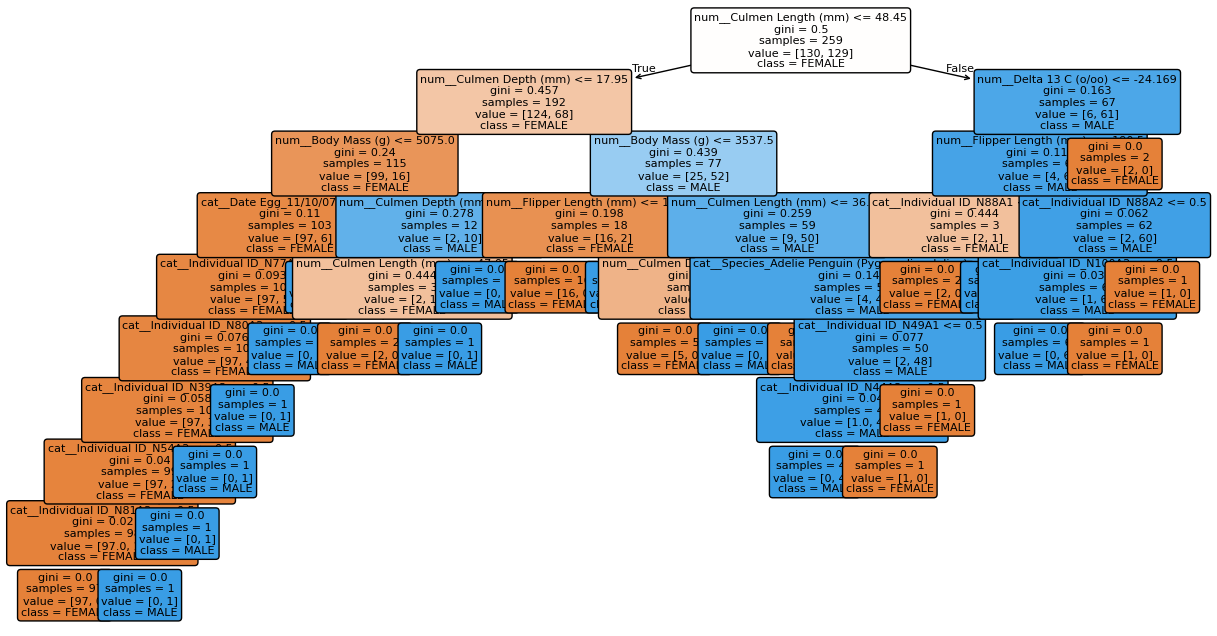

In [68]:
dt = clf.named_steps["model"]

plt.figure(figsize=(15,8))
tree.plot_tree(dt, 
               feature_names=clf.named_steps["preprocessor"].get_feature_names_out(),
               class_names=dt.classes_, 
               filled=True, 
               rounded=True,
               fontsize=8)
plt.show()

## Randon Forest

* Boostrap

* menos features por arvore (também random)

* Agregação

In [65]:
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,              # or try a number like 8–16
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight="balanced",     # helpful if classes are imbalanced
    n_jobs=-1,
    random_state=42
)